# Bank_Term_Deposit
##### ---------Ecolab_Hackathon-----------

In [1]:
#Importing libraries
import warnings 
warnings.filterwarnings('ignore')

#For data pre-processing and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats

#For Model Development
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV

#Performance Matrix of Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score
 

#Model Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

## 1.Data Pre-Processing

In [2]:
od  =pd.read_csv(r"A:\Ecolab_Hackathon_2023\train.csv")  #od = Original Dataset
od.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,retired,married,secondary,no,166,no,yes,unknown,3,jul,211,1,-1,0,unknown,no
1,51,blue-collar,married,primary,no,2995,yes,no,unknown,11,jun,93,2,-1,0,unknown,no
2,50,management,married,tertiary,no,569,no,yes,cellular,18,aug,452,4,-1,0,unknown,no
3,27,admin.,married,secondary,no,73,yes,no,cellular,5,feb,140,1,-1,0,unknown,no
4,38,self-employed,divorced,tertiary,no,6447,no,no,cellular,12,jan,296,1,-1,0,unknown,no


In [3]:
od.shape

(33908, 17)

In [4]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        33908 non-null  int64 
 1   job        33908 non-null  object
 2   marital    33908 non-null  object
 3   education  33908 non-null  object
 4   default    33908 non-null  object
 5   balance    33908 non-null  int64 
 6   housing    33908 non-null  object
 7   loan       33908 non-null  object
 8   contact    33908 non-null  object
 9   day        33908 non-null  int64 
 10  month      33908 non-null  object
 11  duration   33908 non-null  int64 
 12  campaign   33908 non-null  int64 
 13  pdays      33908 non-null  int64 
 14  previous   33908 non-null  int64 
 15  poutcome   33908 non-null  object
 16  y          33908 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.4+ MB


In [5]:
od.duplicated().sum()

0

#### Inference:
1)Data is already in a readable format.<br>
2)Data has shape of 33908*17.<br>
3)Target Variable is y.<br>
4)Data has no duplicates or null values.<br>
5)Data has No. of Categorical Columns = 10 and Numerical Columns = 7.

<b> 1.As Data is Already in a readable format and contains no duplicates or null values we don't need to perform any cleaning.<br>
2.Let's seprate Object Columns and Numeric Columns for EDA.<br>
3.We will be needing target Variable transformed in binary form for EDA so we will be performing it's trasformation, other categorical data will be transformed later in Feature Engineering.

In [6]:
#For changing Categorical data to Binary (Encoding Method)
od["y"]=od["y"].map({"yes":1, "no":0})

In [7]:
# Seprating Object Columns
obj_cols = od.select_dtypes(include = 'object').columns
obj_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [8]:
# Seprating Numeric Columns
num_cols = od.select_dtypes(exclude = 'object').columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

## 2.EDA

### 2.1.Univariate Analysis
->This will help us to Know the Distribution of Data across different Columns which will help us in further analyzing data.

#### 2.1.1.Object_Columns

Frequency Distributuion of categories:


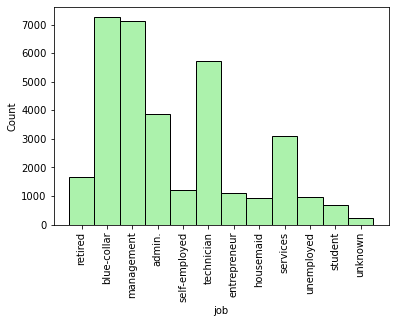

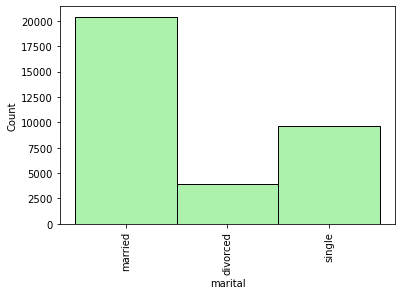

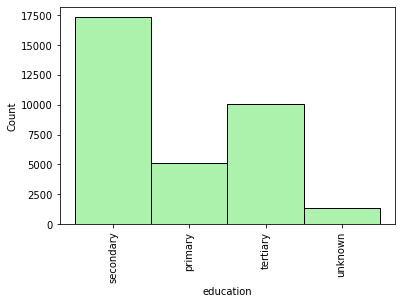

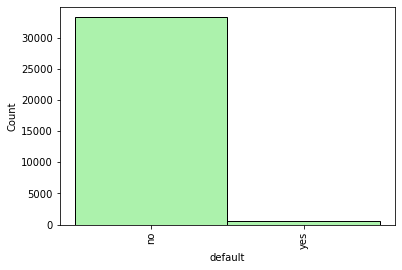

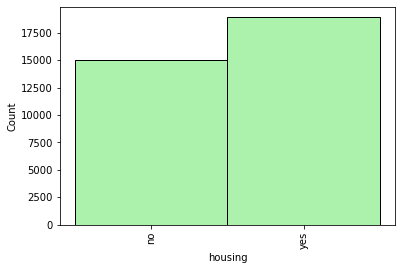

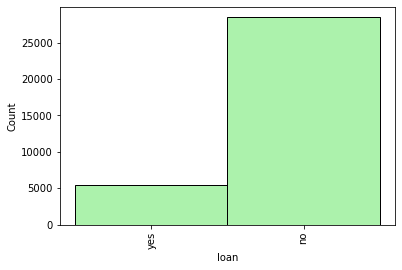

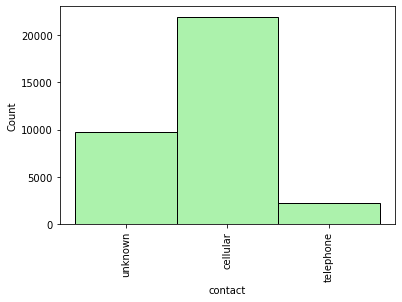

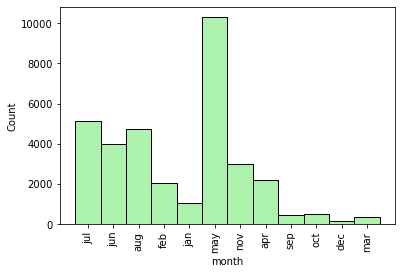

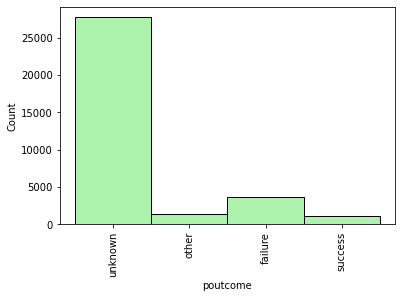

In [9]:
print("Frequency Distributuion of categories:")
for i in obj_cols:
    sns.histplot(x = od[i],color = "lightgreen")
    plt.xticks(rotation=90)                   #For Rotating Labels on x axis.
    plt.show()

#### Inference:
1. People having Blue-Collar and Management Jobs are highest and Unemployed group of people is least in Count.<br>
2. Most people in the data have marital status as married.<br>
3. Most of the people in data have a secondary Education.<br>
4. People having no defaults is much higher compared to people with defaults (yes) which is close to 0.<br>
5. People with house and No house are almost equal in Count.<br>
6. People who have no loan is much higher than people with loan.<br>
7. people were contacted more on cellular than any other Communication type.<br>
8. People were contacted most in the month of may and least in the month of December.<br>
9. The Outcome of previous campaign (poutcome) is mostly Unknown.However, in the Known outcome the rate of failure is more than the success.

#### 2.1.2.Numeric_Columns

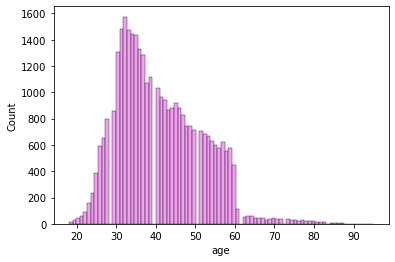

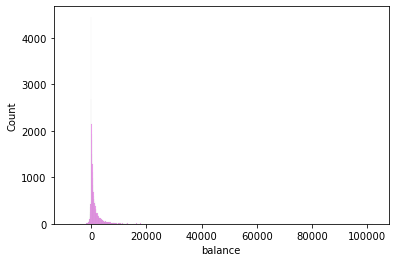

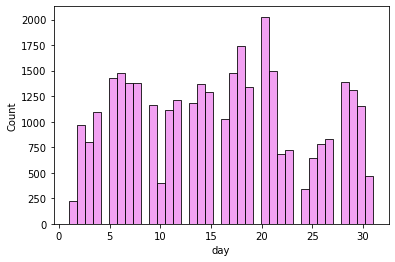

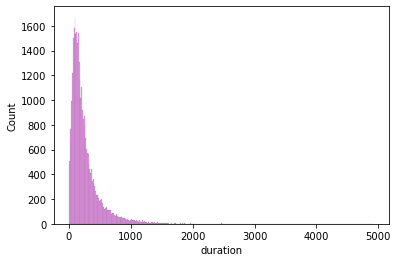

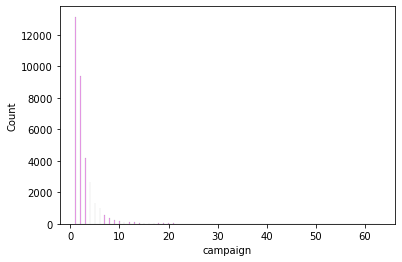

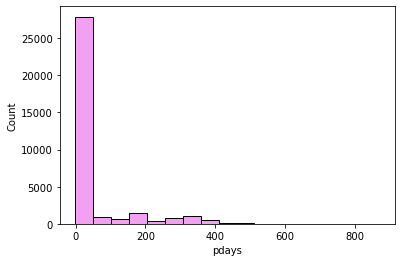

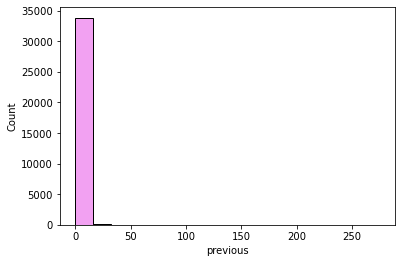

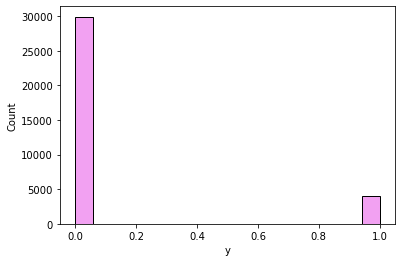

In [10]:
for n in num_cols:
    sns.histplot(x=od[n], color = "violet")
    plt.show()

#### Inference:
1. The age of most people is between 30-40 years.<br>
2. Most people in data have balance close to 0.<br>
3. People were contacted on all days of month.<br>
4. Most people were Contacted 1-2 times only during the campaign.<br>
5. Most People were contacted recently (pdays).<br>
6. Our Target Variable has an imbalanced class distribution.

In [11]:
od.describe(percentiles=[0.01,0.02,0.03,0.05,0.1,0.25,0.4,0.5,0.75,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,10%,25%,40%,50%,75%,95%,96%,97%,98%,99%,max
age,33908.0,40.966763,10.613701,18.0,23.00,25.0,26.0,27.0,29.0,33.0,36.0,39.0,48.0,59.00,59.00,60.0,63.00,71.00,95.0
balance,33908.0,1370.713136,3111.689069,-8019.0,-627.93,-437.0,-319.0,-171.0,0.0,74.0,276.0,450.0,1430.0,5745.65,6572.72,7802.0,9565.08,13307.23,102127.0
day,33908.0,15.803763,8.314558,1.0,2.00,2.0,2.0,3.0,5.0,8.0,13.0,16.0,21.0,29.00,30.00,30.0,30.00,31.00,31.0
duration,33908.0,257.899227,258.607105,0.0,11.00,16.0,22.0,36.0,59.0,103.0,147.0,179.0,318.0,747.00,819.00,910.0,1052.00,1275.93,4918.0
campaign,33908.0,2.752920,3.068299,1.0,1.00,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,8.00,8.00,10.0,12.00,16.00,63.0
pdays,33908.0,40.168515,99.892114,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,318.00,337.00,349.0,360.00,370.00,871.0
previous,33908.0,0.581987,2.412482,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00,4.00,5.0,6.00,8.00,275.0
y,33908.0,0.116993,0.321417,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.00,1.0,1.00,1.00,1.0


#### Inference:
1. The age of people ranges from 18 yrs to 95 yrs.
2. THe balance of people ranges from -8019 to 102127.
3. The duration of call ranges from 0 secs to 4918 secs(16.7 mins approx).
4. People were maximum contacted for 63 times during this campaign.
5. The maximum no of days passed since some people were contacted is 871 (2 yrs aprrox.)
6. The maximum no. of contact performed for peoples before this campaign is 275 times.

#### Outlier Detection:
1. Upper limit: age, balance, duration, campaign, pdays, previous.
2. Lower limit: age, balance, duration.

### 2.2.Bi-Variate Analysis

#### 2.2.1. Cat_to_Cat

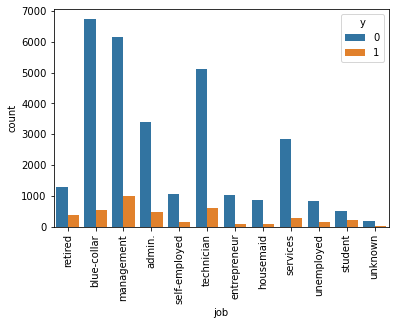

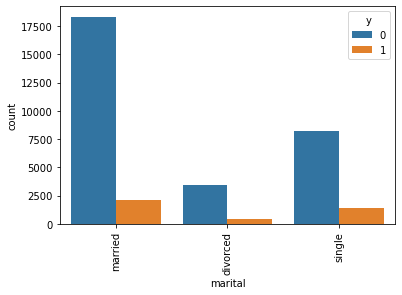

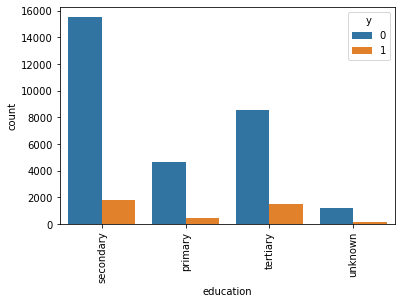

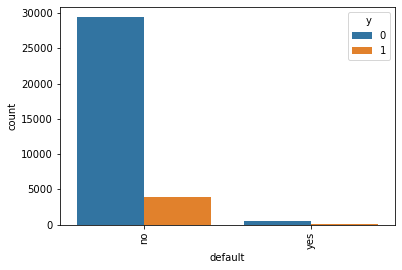

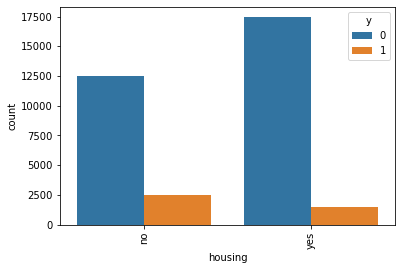

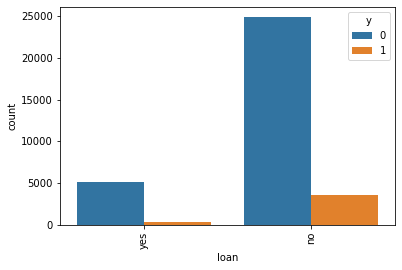

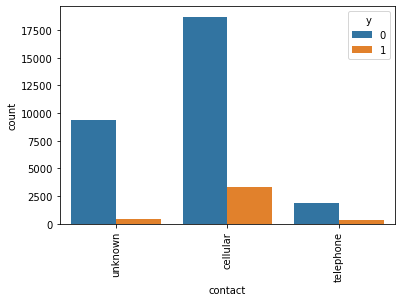

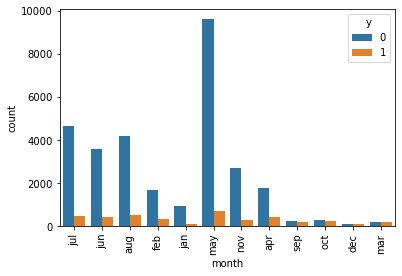

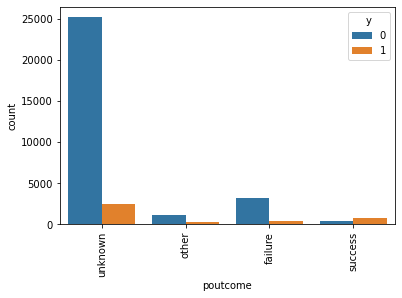

In [12]:
#for distirbution relation of features with target variable
for i in obj_cols:
    sns.countplot(x=od[i],hue=od['y'])
    plt.xticks(rotation=90)
    plt.show()

#### Inference based on Ratio of Yes:No to term Deposit:
1. Students purchase Term deposits more than people who are employed .<br>
2. People who are single purchase Term Deposit more than people who are married.<br>
3. People with a tertiary education purchase term deposit more than people with other type of education.<br>
4. People with a default in their record purchase term deposit more than the people with no default.<br>
5. People with no house purchase term deposit more than people with house.<br>
6. People with no loan purchase term deposit more than people with loan on their name.<br>
7. In March people purchase term deposit more compared to any other month of year.

#### Chi_Square Test_with_Target_Variable

In [13]:
ct = pd.crosstab(od['job'],od['y'])
stats.chi2_contingency(ct)

(635.817475532879,
 3.031554358315485e-129,
 11,
 array([[3408.40686564,  451.59313436],
        [6401.80046007,  848.19953993],
        [ 980.13772561,  129.86227439],
        [ 824.72850065,  109.27149935],
        [6307.31871535,  835.68128465],
        [1480.80267194,  196.19732806],
        [1068.43842161,  141.56157839],
        [2740.85360387,  363.14639613],
        [ 617.22186505,   81.77813495],
        [5054.33183909,  669.66816091],
        [ 866.22982777,  114.77017223],
        [ 190.72950336,   25.27049664]]))

##### Ok Now instead of writing the code again and again for all the categories lets make a loop and since we only need p value out of the results we will be using its index postion.

In [14]:
for i in obj_cols:
    ct = pd.crosstab(od[i],od['y'])      # The Contingency table
    print("\n",i," V/S Y")
    p= stats.chi2_contingency(ct)[1]     #P-Value out of result of Chi-Square at index position 1.
    
    sl = 0.05                            # SL: Significance Level
    print("p value: " + str(p)) 
    
    if p <= sl: 
        print('Reject NULL HYPOTHESIS') 
    else: 
        print('ACCEPT NULL HYPOTHESIS')
    print("-"*50)


 job  V/S Y
p value: 3.031554358315485e-129
Reject NULL HYPOTHESIS
--------------------------------------------------

 marital  V/S Y
p value: 8.163823102572303e-30
Reject NULL HYPOTHESIS
--------------------------------------------------

 education  V/S Y
p value: 4.555540699020701e-40
Reject NULL HYPOTHESIS
--------------------------------------------------

 default  V/S Y
p value: 0.00019754673749781206
Reject NULL HYPOTHESIS
--------------------------------------------------

 housing  V/S Y
p value: 2.366002657240553e-136
Reject NULL HYPOTHESIS
--------------------------------------------------

 loan  V/S Y
p value: 7.0798791053030964e-37
Reject NULL HYPOTHESIS
--------------------------------------------------

 contact  V/S Y
p value: 2.0007226470186825e-171
Reject NULL HYPOTHESIS
--------------------------------------------------

 month  V/S Y
p value: 0.0
Reject NULL HYPOTHESIS
--------------------------------------------------

 poutcome  V/S Y
p value: 0.0
Reject NULL 

#### Inference:
Based on Results of Chi-Square Test all the Categorical Columns are important to target Variable.

#### 2.2.2.Numeric_Columns

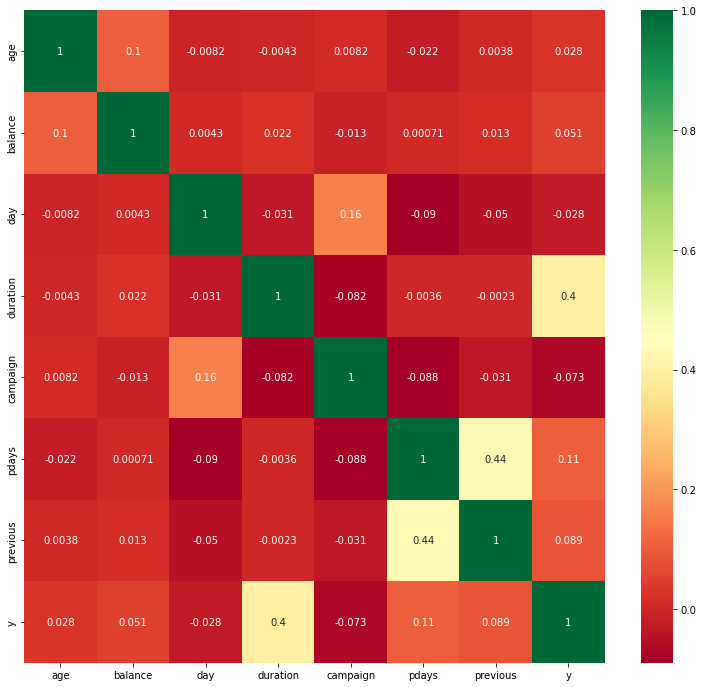

In [15]:
plt.figure(figsize = (13,12))
corr = od.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn')
plt.show()

#### Inference
##### Close to Green:High Correlation ; Close to Red:Low Correlation
1. None of the numeric Columns has correlation between them (No multicollinearity)
2. None of the numeric Column has Correlation with target Variable as well. (Not So important to target Variable)

#### 2.2.3. Cat_to_Num

#### Relationship of Balance with Different Categories

job  V/S balance


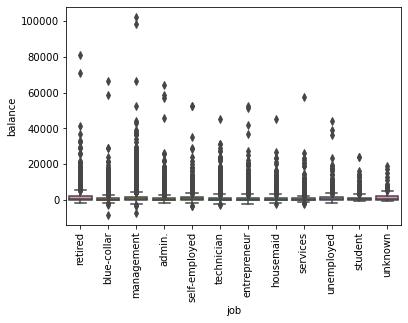

marital  V/S balance


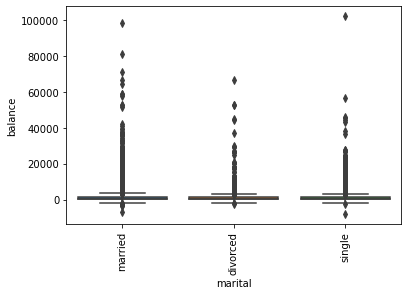

education  V/S balance


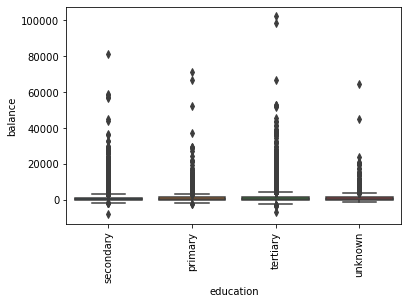

default  V/S balance


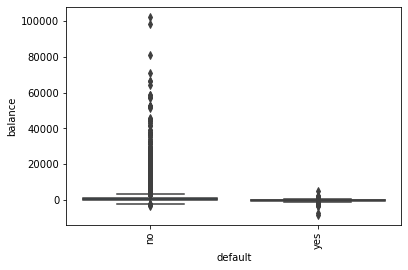

housing  V/S balance


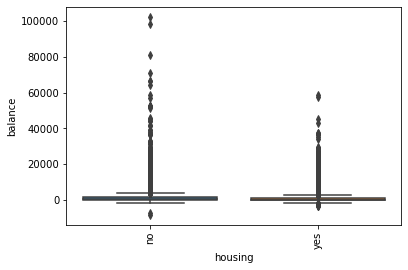

loan  V/S balance


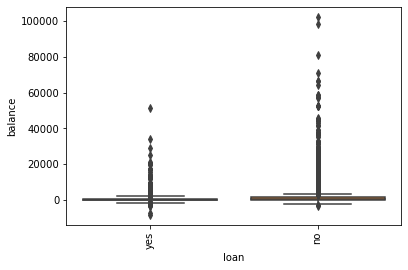

contact  V/S balance


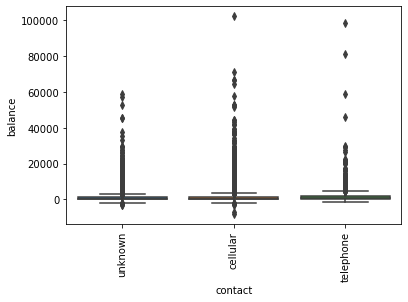

month  V/S balance


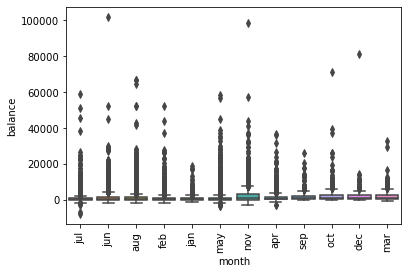

poutcome  V/S balance


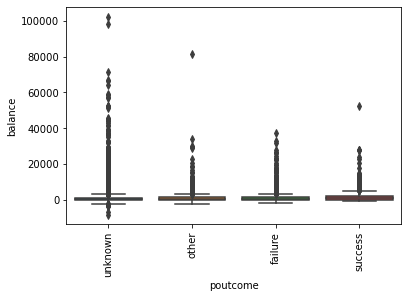

In [16]:
for i in obj_cols:
    print(i," V/S balance")
    sns.boxplot(x=od[i],y=od["balance"])     #barplot,violinplot
    plt.xticks(rotation=90) 
    plt.show()

#### Inference:
1. People with management job profile have a high bank balance compared to other job profiles. <br>
2. People who are married have a high bank balance. <br>
3. People with a teritary education have a high bank balance compared to other type of education.<br>
4. People who made no default have a higher bank balance as well.<br>
5. People with no house have a high bank balance compared to people with house.<br>
6. People with No loan have a high bank balance compared to people with loan.

### 2.3.Multivariate Analysis

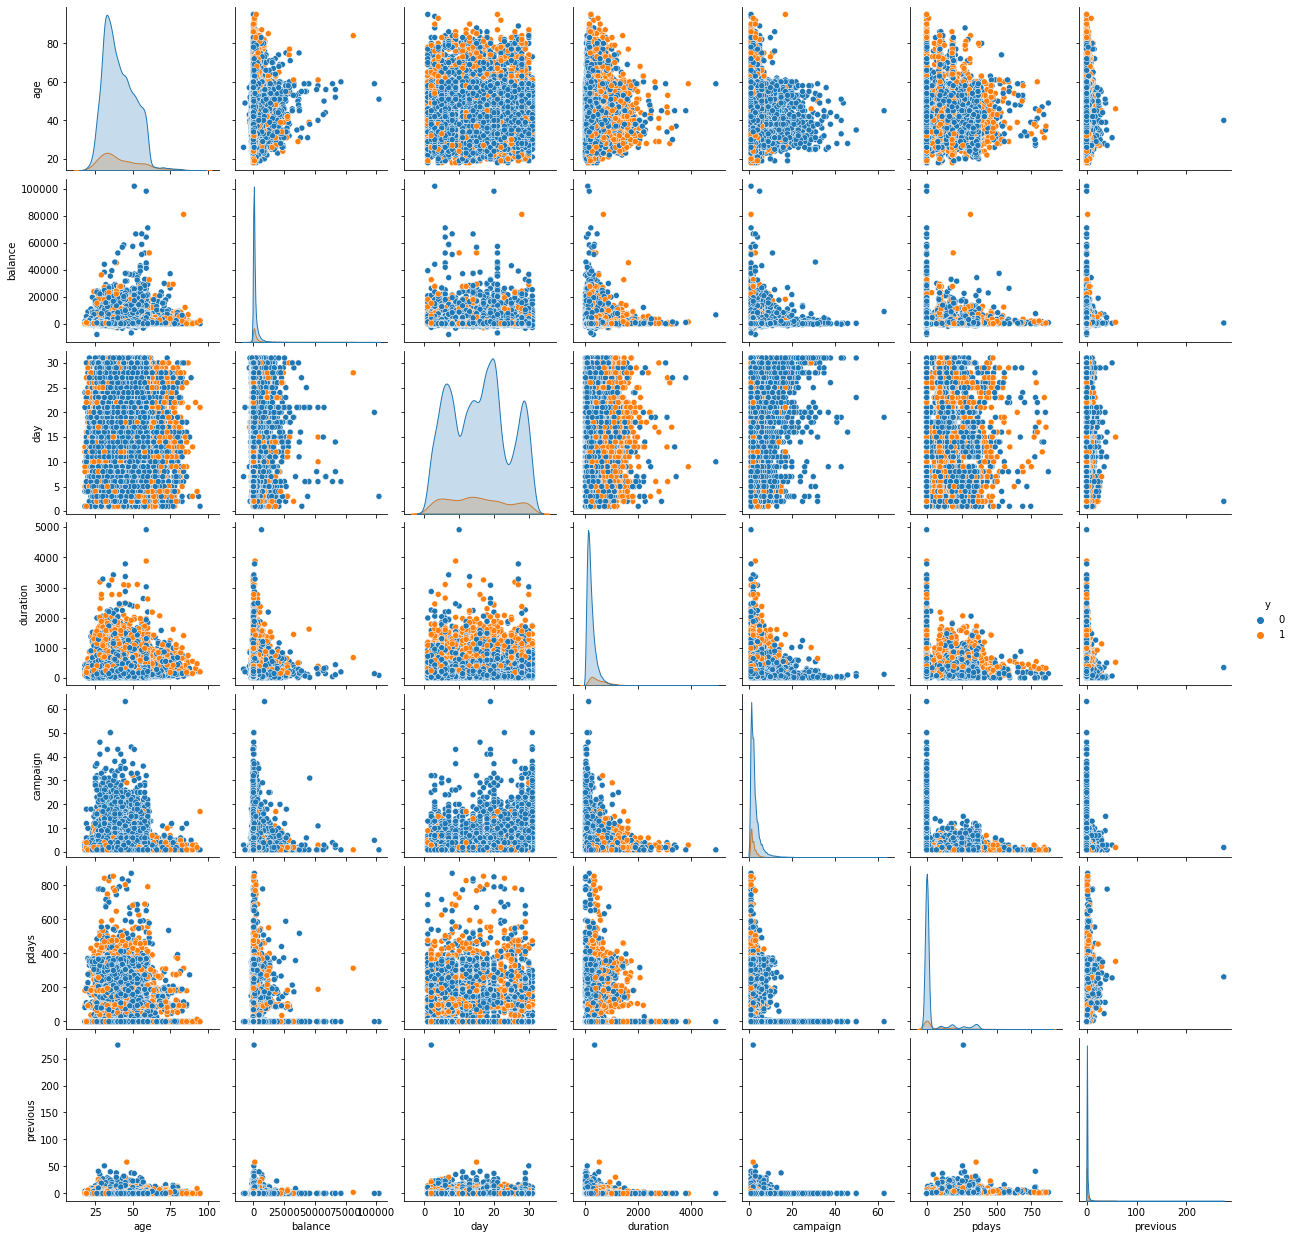

In [17]:
sns.pairplot(od,hue='y',data=od)
plt.show()

#### Inference:
##### 1.Relationship with Eachother
    1. As age is increasing duration of call is decreasing./ They are in a negative relationship.
    2. As age is increasing the balance of people is also decreasing./ They are in a negative Relationship.
    3. As Age of people is increasing the No. of times they were contacted in this campaign is decreasing. / They are in a negative relationship.
    4. As Balance is decreasing the duration of call is increasing.
    5. As Balance is decreasing the no of times people were contacted is increasing.
    6. As Duration of Call is Increasing the Times people were contacted in this campaign is Decreasing.

##### 2. We have Bivariate Outliers at upper limit in:
    a. age with balance and previous.
    b. balance with previous.
    c. day with previous.
    d. duration with previous.
    e. campaign with previous.
    f. pdays with previous.
    g. previous with y.
    
##### 3. Relationship With Target variable:
-> No Relationship has been observed in numeric columns with respect to target variable.

#### Observation:
1. Value of previous that is making outlier with every other column is a single value only.

## 3. Feature Engineering

#### 3.1.Outlier Treatment

In [18]:
cd = od.copy()

In [19]:
ut=["age", "balance", "duration", "campaign", "pdays", "previous"]
lt = ["age", "balance", "duration"]

In [76]:
for i in ut:
    cd[i] = cd[i].clip(upper=cd[i].quantile(0.99))

In [77]:
for k in lt:
    cd[k] = cd[k].clip(lower=cd[k].quantile(0.01))

In [78]:
cd

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,56.0,retired,married,secondary,no,166.0,no,yes,unknown,3,jul,211.0,1.0,-1.0,0.0,unknown,0
1,51.0,blue-collar,married,primary,no,2995.0,yes,no,unknown,11,jun,93.0,2.0,-1.0,0.0,unknown,0
2,50.0,management,married,tertiary,no,569.0,no,yes,cellular,18,aug,452.0,4.0,-1.0,0.0,unknown,0
3,27.0,admin.,married,secondary,no,73.0,yes,no,cellular,5,feb,140.0,1.0,-1.0,0.0,unknown,0
4,38.0,self-employed,divorced,tertiary,no,3576.3,no,no,cellular,12,jan,296.0,1.0,-1.0,0.0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,32.0,admin.,single,secondary,no,471.0,no,yes,cellular,2,apr,243.0,3.0,-1.0,0.0,unknown,1
33904,44.0,management,married,tertiary,no,0.0,yes,no,cellular,20,aug,141.0,3.0,-1.0,0.0,unknown,0
33905,42.0,technician,single,secondary,no,0.0,yes,no,unknown,6,may,293.0,1.0,-1.0,0.0,unknown,0
33906,34.0,technician,married,tertiary,no,116.0,no,no,cellular,11,aug,145.0,2.0,-1.0,0.0,unknown,0


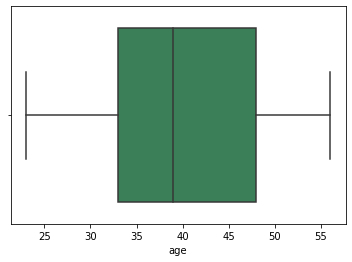

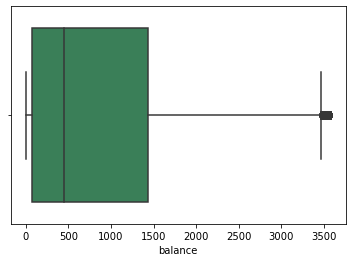

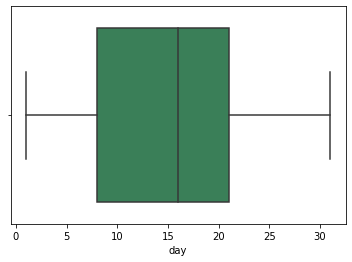

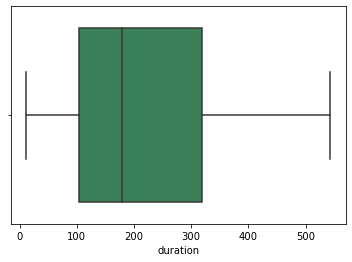

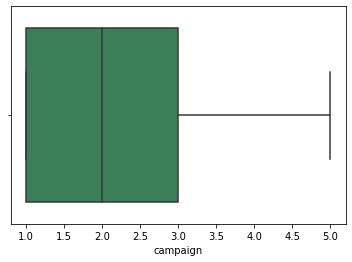

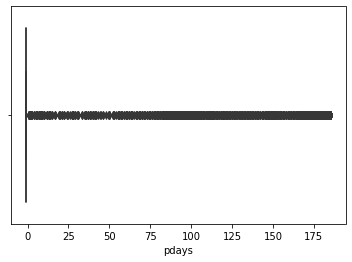

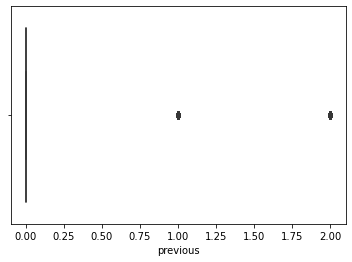

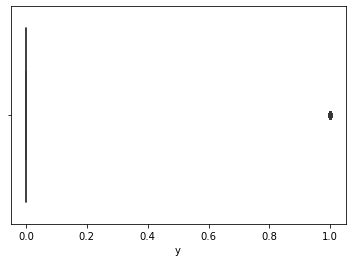

In [79]:
for n in num_cols:
    sns.boxplot(x=cd[n], color = "seagreen")
    plt.show()

In [80]:
cd.describe(percentiles=[0.01,0.02,0.03,0.05,0.1,0.25,0.4,0.5,0.75,0.90,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,10%,25%,40%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,33908.0,40.468474,9.473199,23.0,23.0,25.0,26.0,27.0,29.0,33.0,36.0,39.0,48.0,56.00,56.0,56.0,56.0,56.0,56.0,56.0
balance,33908.0,973.774074,1174.803448,0.0,0.0,0.0,0.0,0.0,0.0,74.0,276.0,450.0,1430.0,3576.09,3576.3,3576.3,3576.3,3576.3,3576.3,3576.3
day,33908.0,15.803763,8.314558,1.0,2.0,2.0,2.0,3.0,5.0,8.0,13.0,16.0,21.0,28.00,29.0,30.0,30.0,30.0,31.0,31.0
duration,33908.0,226.111360,157.929830,11.0,11.0,16.0,22.0,36.0,59.0,103.0,147.0,179.0,318.0,543.00,543.0,543.0,543.0,543.0,543.0,543.0
campaign,33908.0,2.293530,1.394700,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,5.00,5.0,5.0,5.0,5.0,5.0,5.0
pdays,33908.0,27.976908,64.055539,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,185.00,185.0,185.0,185.0,185.0,185.0,185.0
previous,33908.0,0.304294,0.674200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00,2.0,2.0,2.0,2.0,2.0,2.0
y,33908.0,0.116993,0.321417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0


#### We still have outliers in balance column tha needs cliping on both sides for negatives on lower side and for larger values on upper limit.

In [81]:
cd["balance"] = cd["balance"].clip(upper=cd["balance"].quantile(0.98))
cd["balance"] = cd["balance"].clip(lower=cd["balance"].quantile(0.10))

#### 3.2. Creating Transformtion Pipeline

In [82]:
# split the data in training and testing sets
x_train, x_test, y_train, y_test = tts(cd.drop(columns = ["y"],axis = 1), cd['y'], test_size=0.25,
                                                    random_state=40, shuffle=True)

In [83]:
from collections import Counter
Counter(y_train)

Counter({0: 22496, 1: 2935})

Data is Imbalanced the ratio between value is [7.6:1] and doing an oversampling for covering such a ratio will lead to model calculating performance on false samples and we need values of 1 to be more or atleast equal so we will be doing under sampling here.By doing this we do have less values but all authentic.  

In [84]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [85]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
cd_majority = cd[(cd['y']==0)] 
cd_minority = cd[(cd['y']==1)] 
cd_resample = resample(cd_minority, 
                       replace=True,    # sample with No Replacement
                       n_samples= 22496, # to match minority class
                       random_state=42)  # reproducible results
# Combine resampled minority class with majority class
cd2 = pd.concat([cd_resample, cd_majority])

In [86]:
# split the data in training and testing sets
x_train, x_test, y_train, y_test = tts(cd2.drop(columns = ["y"],axis = 1), cd2['y'], test_size=0.25,
                                                    random_state=40, shuffle=True)

In [87]:
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
12362,48.0,management,married,tertiary,no,11.0,yes,no,cellular,21,aug,102.0,5.0,-1.0,0.0,unknown
13572,45.0,blue-collar,married,secondary,no,603.0,no,no,cellular,22,may,204.0,1.0,-1.0,0.0,unknown
17316,24.0,student,single,secondary,no,822.0,no,no,cellular,27,oct,184.0,1.0,91.0,2.0,failure
2879,51.0,unemployed,married,secondary,no,3576.3,yes,no,telephone,30,jan,237.0,2.0,-1.0,0.0,unknown
32161,32.0,management,divorced,tertiary,no,874.0,no,no,cellular,12,aug,543.0,5.0,-1.0,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,43.0,technician,married,secondary,no,0.0,no,no,cellular,19,aug,103.0,2.0,-1.0,0.0,unknown
23848,56.0,admin.,divorced,secondary,no,1947.0,no,no,telephone,26,oct,228.0,1.0,-1.0,0.0,unknown
9332,31.0,management,single,tertiary,no,3576.3,yes,yes,unknown,8,may,20.0,1.0,-1.0,0.0,unknown
28129,45.0,housemaid,married,tertiary,no,40.0,yes,no,cellular,3,sep,81.0,1.0,185.0,1.0,failure


In [88]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

In [89]:
from sklearn.preprocessing import OneHotEncoder

In [90]:
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel

In [91]:
trans_pipe = ColumnTransformer(transformers =
                               [('encoding',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[1,2,3,4,6,7,8,10,15]),
                                ('Scaling',StandardScaler(),[5])],
                               remainder='passthrough')

## 4. Model Development

#### 4.1. Logistic Regression

In [92]:
lr_pipe = Pipeline([('trans_pipe',trans_pipe),('log_reg',LogisticRegression())])

lr_pipe.fit(x_train,y_train)

Pipeline(steps=[('trans_pipe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 6, 7, 8, 10,
                                                   15]),
                                                 ('Scaling', StandardScaler(),
                                                  [5])])),
                ('log_reg', LogisticRegression())])

In [93]:
lr_ypred = lr_pipe.predict(x_test)

In [94]:
print(classification_report(y_test,lr_ypred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7494
           1       0.78      0.77      0.78      5616

    accuracy                           0.81     13110
   macro avg       0.80      0.80      0.80     13110
weighted avg       0.81      0.81      0.81     13110



<b> Now instead of repeating same steps again and again lets create a function for it.

In [95]:
def algorithm(model_pipeline,x_train,x_test,y_train,y_test):
    """It's a Function where you pass model_pipeline as argument and it return you value as 
    f1-Score, Accuracy, Precision Which you can store in a variable."""
    model_pipeline.fit(x_train,y_train)
    y_pred = model_pipeline.predict(x_test)
    f1=f1_score(y_test,y_pred)
    y_res = model_pipeline.predict(x_train)
    train_acc = accuracy_score(y_train,y_res)
    test_acc= accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    print(classification_report(y_test,y_pred))
    return f1,train_acc,test_acc,prec,rec

In [96]:
lr_f1,lr_acc,lr_acc2,lr_prec,lr_rec=algorithm(lr_pipe,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7494
           1       0.78      0.77      0.78      5616

    accuracy                           0.81     13110
   macro avg       0.80      0.80      0.80     13110
weighted avg       0.81      0.81      0.81     13110



In [97]:
res1 = pd.DataFrame({'Model':'Log_Reg',"F1-Score":lr_f1,"Train_Accuracy":lr_acc,"Test_Accuracy":lr_acc2,'Precision':lr_prec,'Recall':lr_rec},index=[0])
res1

,Model,F1-Score,Train_Accuracy,Test_Accuracy,Precision,Recall
0,Log_Reg,0.775419,0.817174,0.807933,0.776805,0.774038


In [98]:
help(algorithm)

Help on function algorithm in module __main__:

algorithm(model_pipeline, x_train, x_test, y_train, y_test)
    It's a Function where you pass model_pipeline as argument and it return you value as 
    f1-Score, Accuracy, Precision Which you can store in a variable.



This looks fine the results of function matches with the result of manual method.

#### 4.2. Random Forest

In [99]:
RF_pipe = Pipeline([('Transformation',trans_pipe),('Algorithm',RandomForestClassifier())])

In [100]:
rf_f1,rf_acc,rf_acc2,rf_prec,rf_rec=algorithm(RF_pipe,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      7494
           1       0.92      0.99      0.95      5616

    accuracy                           0.96     13110
   macro avg       0.96      0.96      0.96     13110
weighted avg       0.96      0.96      0.96     13110



In [101]:
res2 = pd.DataFrame({'Model':'Random Forest',"F1-Score":rf_f1,"Train_Accuracy":rf_acc,"Test_Accuracy":rf_acc2,'Precision':rf_prec,'Recall':rf_rec},index=[1])
res2

,Model,F1-Score,Train_Accuracy,Test_Accuracy,Precision,Recall
1,Random Forest,0.954191,1.0,0.959191,0.919017,0.992165


#### 4.3. XG- BOOST

In [102]:
XG_pipe = Pipeline([('Transformation',trans_pipe),('Algorithm',XGBClassifier())])

In [103]:
xg_f1,xg_acc,xg_acc2,xg_prec,xg_rec=algorithm(XG_pipe,x_train,x_test,y_train,y_test)

[18:03:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      7494
           1       0.87      0.95      0.91      5616

    accuracy                           0.92     13110
   macro avg       0.91      0.92      0.92     13110
weighted avg       0.92      0.92      0.92     13110



In [104]:
res3 = pd.DataFrame({'Model':'XG-Boost',"F1-Score":xg_f1,"Train_Accuracy":xg_acc,"Test_Accuracy":xg_acc2,'Precision':xg_prec,'Recall':xg_rec},index=[2])
res3

,Model,F1-Score,Train_Accuracy,Test_Accuracy,Precision,Recall
2,XG-Boost,0.90701,0.946805,0.916323,0.865556,0.952635


Let's see how the algorithm exclusively made for classification works

#### 4.4. Naive Bayes

In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
NB_pipe = Pipeline([('Transformation',trans_pipe),('Algorithm',GaussianNB())])

In [107]:
nb_f1,nb_acc,nb_acc2,nb_prec,nb_rec=algorithm(NB_pipe,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.68      0.88      0.77      7494
           1       0.74      0.45      0.56      5616

    accuracy                           0.70     13110
   macro avg       0.71      0.67      0.67     13110
weighted avg       0.71      0.70      0.68     13110



In [108]:
res4 = pd.DataFrame({'Model':'Naive Bayes',"F1-Score":nb_f1,"Train_Accuracy":nb_acc,"Test_Accuracy":nb_acc2,'Precision':nb_prec,'Recall':nb_rec},index=[3])
res4

,Model,F1-Score,Train_Accuracy,Test_Accuracy,Precision,Recall
3,Naive Bayes,0.560195,0.706741,0.697941,0.744392,0.449074


#### 4.5. SV Classifier

In [109]:
SVC_pipe = Pipeline([('Transformation',trans_pipe),('Algorithm',SVC())])
svc_f1,svc_acc,svc_acc2,svc_prec,svc_rec=algorithm(SVC_pipe,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      7494
           1       0.76      0.68      0.72      5616

    accuracy                           0.77     13110
   macro avg       0.77      0.76      0.76     13110
weighted avg       0.77      0.77      0.77     13110



In [110]:
res5 = pd.DataFrame({'Model':'SVC',"F1-Score":svc_f1,"Train_Accuracy":svc_acc,"Test_Accuracy":svc_acc2,'Precision':svc_prec,'Recall':svc_rec},index=[4])
res5

,Model,F1-Score,Train_Accuracy,Test_Accuracy,Precision,Recall
4,SVC,0.715627,0.77982,0.769031,0.757154,0.678419


In [111]:
result = pd.concat([res1,res2,res3,res4,res5])
result

,Model,F1-Score,Train_Accuracy,Test_Accuracy,Precision,Recall
0,Log_Reg,0.775419,0.817174,0.807933,0.776805,0.774038
1,Random Forest,0.954191,1.000000,0.959191,0.919017,0.992165
2,XG-Boost,0.907010,0.946805,0.916323,0.865556,0.952635
3,Naive Bayes,0.560195,0.706741,0.697941,0.744392,0.449074
4,SVC,0.715627,0.779820,0.769031,0.757154,0.678419


<Figure size 864x1440 with 0 Axes>

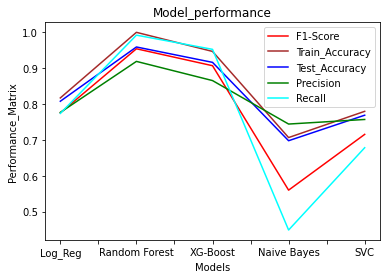

In [112]:
#Plot the Performance Matrix
plt.figure(figsize=(12, 20))
result.plot(x='Model',y=["F1-Score",'Train_Accuracy','Test_Accuracy','Precision','Recall'], color=['red','brown','blue','green','cyan'])
plt.title('Model_performance')
plt.ylabel('Performance_Matrix')
plt.xlabel('Models')
plt.legend=True
plt.show()

In [113]:
result.to_csv("A:\Performance.csv")

<b> among all the algorithm Random-Forest is Performing Best but its overfitting a little so lets tune parameters.

In [114]:
rf2=RandomForestClassifier()

In [115]:
params={"n_estimators": [100,200,250],
       "max_depth" :[7,9,10],
       "min_samples_split":[20, 50,100],
       "min_samples_leaf": [15,30,40]
       }

In [116]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
rf2=RandomForestClassifier(random_state=0)     #declaration of model in an object in order to use it in gridsearch

rf_rand = RandomizedSearchCV(rf2,params,n_iter=10,scoring = 'roc_auc',n_jobs=-1,cv=10,verbose=1)

In [118]:
rf2_pipe = Pipeline([('Transformation',trans_pipe),('Algorithm',rf_rand)])

In [119]:
rf2_f1,rf2_acc,rf2_acc2,rf2_prec,rf2_rec=algorithm(rf2_pipe,x_train,x_test,y_train,y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7494
           1       0.82      0.84      0.83      5616

    accuracy                           0.85     13110
   macro avg       0.85      0.85      0.85     13110
weighted avg       0.85      0.85      0.85     13110



In [120]:
res6 = pd.DataFrame({'Model':'rf2',"F1-Score":rf2_f1,"Train_Accuracy":rf2_acc,"Test_Accuracy":rf2_acc2,'Precision':rf2_prec,'Recall':rf2_rec},index=[5])
res6

,Model,F1-Score,Train_Accuracy,Test_Accuracy,Precision,Recall
5,rf2,0.8281,0.862893,0.850496,0.815935,0.840634


In [121]:
result2 = pd.concat([result,res6])
result2

,Model,F1-Score,Train_Accuracy,Test_Accuracy,Precision,Recall
0,Log_Reg,0.775419,0.817174,0.807933,0.776805,0.774038
1,Random Forest,0.954191,1.000000,0.959191,0.919017,0.992165
2,XG-Boost,0.907010,0.946805,0.916323,0.865556,0.952635
3,Naive Bayes,0.560195,0.706741,0.697941,0.744392,0.449074
4,SVC,0.715627,0.779820,0.769031,0.757154,0.678419
5,rf2,0.828100,0.862893,0.850496,0.815935,0.840634


#### Random Forest with No hyper parameter Tuning is performing best

### Let's Load Test Data

In [122]:
test_data = pd.read_csv(r"A:\Ecolab_Hackathon_2023\test.csv")

In [123]:
test_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,management,married,tertiary,no,6060,yes,no,unknown,15,may,71,2,-1,0,unknown
1,59,blue-collar,married,primary,no,99,yes,no,cellular,5,feb,43,1,261,3,failure
2,37,housemaid,married,primary,no,0,yes,no,cellular,24,jul,347,5,-1,0,unknown
3,41,blue-collar,divorced,secondary,no,-90,yes,no,cellular,18,nov,103,6,-1,0,unknown
4,27,student,single,tertiary,no,4869,yes,no,cellular,15,may,258,2,343,4,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11298,48,self-employed,married,tertiary,no,3118,no,no,cellular,13,aug,371,2,-1,0,unknown
11299,50,blue-collar,married,primary,no,3924,yes,no,cellular,20,apr,122,2,-1,0,unknown
11300,51,self-employed,single,tertiary,no,0,yes,no,cellular,11,jul,139,2,-1,0,unknown
11301,29,blue-collar,married,secondary,no,195,yes,no,cellular,11,may,333,1,-1,0,unknown


In [124]:
predictions=RF_pipe.predict(test_data)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
output=pd.DataFrame(data = predictions,columns=["pred"], dtype='int64')

In [126]:
sub = pd.read_csv(r'A:\Ecolab_Hackathon_2023\submission.csv')

In [127]:
sub

,Serial_no,pred
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
11298,11299,NaN
11299,11300,NaN
11300,11301,NaN
11301,11302,NaN


In [128]:
submission = pd.concat([sub['Serial_no'],output], axis=1,ignore_index=False)

In [129]:
submission

,Serial_no,pred
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
11298,11299,0
11299,11300,0
11300,11301,0
11301,11302,0


In [130]:
submission['pred'].value_counts()

0    9906
1    1397
Name: pred, dtype: int64

In [131]:
submission.to_csv("A:submission.csv")